## Libraries

In [1]:
import pandas as pd
import numpy as np
from random import random
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tf.__version__

'2.9.0'

## Train/val/pred split

In [3]:
def import_datasets():
            
    # import training and prediction datasets
    train_dataset = pd.read_csv(r'./trainpred_dataset/FIA1_20142022_train_dataset.csv')
    pred_dataset = pd.read_csv(r'./trainpred_dataset/FIA1_20142022_pred_dataset.csv')
    train_dataset["period"] = train_dataset["period"].astype(int)
    
    windows = train_dataset["window"].unique()
    
    # list with portfolios
    pred_port_list = pred_dataset[pred_dataset["window"] == 0].iloc[:,:4].values.tolist()
    
    train_win_list = []
    pred_win_list = []
    
    # split datasets by windows
    for w in windows:
        
        train = train_dataset[train_dataset["window"] == w]
        pred = pred_dataset[pred_dataset["window"] == w]
        
        # drop funds columns
        train_prev = train.drop(train.columns[:4], axis=1).reset_index(drop=True)
        pred_prev = pred.drop(pred.columns[:4], axis=1).reset_index(drop=True)
        
        train_win_list.append(train_prev)
        pred_win_list.append(pred_prev)
        
    
    return train_win_list, pred_win_list, pred_port_list


In [4]:
def train_val_pred_split():
    
    train_sets, pred_sets, pred_port_list = import_datasets()
    
    # splits the training dataset in training and validation sets
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=42)
    
    dic_train = {}
    dic_val = {}
    dic_pred = {}
    
    # stratified split per periods
    for w, train_set in enumerate(train_sets):
        for train_index, val_index in split.split(train_set, train_set["period"]):
            strat_train_set = train_set.loc[train_index]
            strat_val_set = train_set.loc[val_index]
            
            X_train = strat_train_set.drop(strat_train_set.columns[-6:], axis=1)
            y_train = strat_train_set.loc[:, ["w_F1", "w_F2","w_F3","w_F4"]]
            
            X_val = strat_val_set.drop(strat_val_set.columns[-6:], axis=1)
            y_val = strat_val_set.loc[:, ["w_F1", "w_F2","w_F3","w_F4"]]
            
            X_pred = pred_sets[w].drop(pred_sets[w].columns[-6:], axis=1)
            
            dic_train[w] = [X_train, y_train]
            dic_val[w] = [X_val, y_val]
            dic_pred[w] = X_pred


    return dic_train, dic_val, dic_pred, pred_port_list

In [5]:
# get all datasets and portfolios list
dic_train, dic_val, dic_pred, pred_port_list = train_val_pred_split()


In [6]:
# 2° window training inputs (2016 to 2021)
dic_train[2][0]

,ret_F1,ret_F2,ret_F3,ret_F4,rsk_F1,rsk_F2,rsk_F3,rsk_F4,CORR_F1F2,CORR_F1F3,CORR_F1F4,CORR_F2F3,CORR_F2F4,CORR_F3F4
66083,0.171939,0.270738,0.394526,0.273058,0.143839,0.196426,0.141295,0.129794,0.827951,0.729154,0.692460,0.773838,0.716855,0.712572
39709,0.475044,0.489305,0.311326,0.251790,0.384417,0.194289,0.192601,0.198278,0.727292,0.766216,0.756955,0.838467,0.819654,0.928007
88178,0.363362,0.257881,0.375526,0.381995,0.179756,0.181495,0.213341,0.145330,0.894073,0.736210,0.818167,0.736360,0.862172,0.696347
29905,0.200433,0.320284,0.381995,0.310304,0.137747,0.178042,0.182803,0.221800,0.919326,0.892861,0.796780,0.949429,0.868108,0.906294
68162,0.245617,0.489305,0.212685,0.175012,0.182380,0.194289,0.129613,0.143440,0.847846,0.897266,0.920668,0.805347,0.812089,0.927220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92959,0.294656,0.257881,0.318545,0.314083,0.195730,0.181495,0.144882,0.159112,0.902889,0.898130,0.898642,0.903643,0.877912,0.904116
75337,0.318315,0.244021,0.314083,0.230774,0.312862,0.194807,0.159112,0.205234,0.767546,0.774393,0.779156,0.882857,0.817841,0.827642
2418,1.080724,0.433474,0.168252,0.611184,0.400353,0.155556,0.196828,0.132727,0.616322,0.587333,0.560948,0.734766,0.638158,0.615747
85916,0.261629,0.263809,0.240980,0.218185,0.166025,0.147950,0.183468,0.166329,0.939175,0.949920,0.943013,0.922402,0.903907,0.955173


In [7]:
# 2° window training targets (2016 to 2021)
dic_train[2][1]

,w_F1,w_F2,w_F3,w_F4
66083,0.03668,0.00000,0.74776,0.21556
39709,0.00000,0.54199,0.45801,0.00000
88178,0.09760,0.00000,0.90240,0.00000
29905,0.40062,0.00000,0.00000,0.59938
68162,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...
92959,1.00000,0.00000,0.00000,0.00000
75337,0.00000,0.00000,0.00000,1.00000
2418,0.00000,0.00000,0.01841,0.98159
85916,0.00000,1.00000,0.00000,0.00000


In [8]:
# 2° window validation inputs (2016 to 2021)
dic_val[2][0]

,ret_F1,ret_F2,ret_F3,ret_F4,rsk_F1,rsk_F2,rsk_F3,rsk_F4,CORR_F1F2,CORR_F1F3,CORR_F1F4,CORR_F2F3,CORR_F2F4,CORR_F3F4
27010,0.303668,0.271785,0.381995,0.406781,0.153158,0.183402,0.182803,0.195840,0.937055,0.951249,0.914703,0.956369,0.929685,0.945771
2257,1.080724,0.433474,0.200433,0.310304,0.400353,0.155556,0.137747,0.221800,0.616322,0.638677,0.626298,0.745024,0.749633,0.796780
87926,0.363362,0.294656,0.334630,0.325760,0.179756,0.195730,0.188213,0.154691,0.883020,0.911491,0.882312,0.942374,0.906812,0.925820
12275,0.169064,0.246350,0.433474,0.320284,0.153151,0.123095,0.155556,0.178042,0.768981,0.768350,0.879922,0.756725,0.884654,0.791458
63921,0.237258,0.489305,0.293444,0.253873,0.147235,0.194289,0.219392,0.201845,0.830951,0.844052,0.890913,0.854635,0.836828,0.897772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67535,0.270738,0.222538,0.251790,0.210456,0.196426,0.152728,0.198278,0.184630,0.876043,0.867968,0.897305,0.898244,0.923962,0.936867
34646,0.326419,0.173203,0.611184,0.381995,0.168608,0.068897,0.132727,0.182803,0.545960,0.663229,0.928713,0.353593,0.519026,0.700075
104149,0.240980,0.375526,0.314083,0.218185,0.183468,0.213341,0.159112,0.166329,0.735838,0.919913,0.955173,0.695143,0.708400,0.906779
91972,0.367576,0.240980,0.342705,0.218185,0.192908,0.183468,0.191335,0.166329,0.912317,0.803734,0.875501,0.851291,0.955173,0.835866


In [9]:
print(pred_port_list[:5])
print(len(pred_port_list))

[['Alaska Black FIC FIA BDR Nível I', 'Apex Ações 30 FIC FIA', 'ARX Income FIC FIA', 'Atlas One FIC FIA'], ['Alaska Black FIC FIA BDR Nível I', 'Apex Ações 30 FIC FIA', 'ARX Income FIC FIA', 'Atmos Ações FIC FIA'], ['Alaska Black FIC FIA BDR Nível I', 'Apex Ações 30 FIC FIA', 'ARX Income FIC FIA', 'AZ Quest Small Mid Caps FIC FIA'], ['Alaska Black FIC FIA BDR Nível I', 'Apex Ações 30 FIC FIA', 'ARX Income FIC FIA', 'Bahia AM Smid Caps Valor FIC FIA'], ['Alaska Black FIC FIA BDR Nível I', 'Apex Ações 30 FIC FIA', 'ARX Income FIC FIA', 'BNP Paribas Small Caps FIA']]
35960


## Inputs scaler

In [10]:
# scaling training, validation as prediction inputs
minmax_scaler = MinMaxScaler()

dic_train_prep = {}
dic_val_prep = {}
dic_pred_prep = {}

for w in dic_train.keys():
    
    X_train_prepared = minmax_scaler.fit_transform(dic_train[w][0])
    X_val_prepared = minmax_scaler.transform(dic_val[w][0])
    X_pred_prepared = minmax_scaler.transform(dic_pred[w])

    dic_train_prep[w] = [X_train_prepared, dic_train[w][1].values]
    dic_val_prep[w] = [X_val_prepared, dic_val[w][1].values]
    dic_pred_prep[w] = [X_pred_prepared, None]


In [11]:
# 2° window scaled training inputs janela (2016 a 2021)
dic_train_prep[2][0]

array([[0.19707415, 0.34700268, 0.48046341, ..., 0.68545949, 0.59251392,
        0.59050215],
       [0.46487261, 0.58264722, 0.39076242, ..., 0.79087588, 0.76019014,
        0.94488175],
       [0.36619927, 0.33314106, 0.45997805, ..., 0.62432819, 0.82954028,
        0.56381236],
       ...,
       [1.        , 0.52245407, 0.23650929, ..., 0.6217295 , 0.46415285,
        0.43122956],
       [0.27631706, 0.33953279, 0.31492   , ..., 0.92778146, 0.89761452,
        0.98956781],
       [0.26217025, 0.46459102, 0.31370778, ..., 0.88123395, 0.83479804,
        0.92420606]])

## Train the model

In [12]:
def NN_model():
    
    # build Neural Networks model and architeture: 14 (inputs) -> 3 x 20 layers -> 4 (outputs)
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape = (dic_train_prep[0][0].shape[1],)))
    model.add(tf.keras.layers.Dense(20, activation = "relu"))
    model.add(tf.keras.layers.Dense(20, activation = "relu"))
    model.add(tf.keras.layers.Dense(20, activation = "relu"))
    model.add(tf.keras.layers.Dense(4, activation = "softmax"))
    
    # compile the model
    opt = tf.keras.optimizers.Adam()
    # opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
    model.compile(optimizer = opt, loss = "mse")
    
    return model


In [13]:
dict_train_history = {}
dict_val_history = {}

# train Neural Networks
for w in dic_train_prep.keys():
    
    print("\nTraining window: ", w)
    
    model = NN_model()
    
    history = model.fit(dic_train_prep[w][0],
                        dic_train_prep[w][1],
                        epochs = 600,
                        batch_size=32,
                        validation_data = (dic_val_prep[w][0], dic_val_prep[w][1]),
                        verbose = 0
                       )
    
    dic_pred_prep[w][1] = model.predict(dic_pred_prep[w][0])
    
    dict_train_history[w] = [history.epoch, history.history["loss"]]
    dict_val_history[w] = [history.epoch, history.history["val_loss"]]
    


Training window:  0
1124/1124 [==============================] - 2s 1ms/step

Training window:  1
1124/1124 [==============================] - 2s 1ms/step

Training window:  2
1124/1124 [==============================] - 1s 1ms/step

Training window:  3
1124/1124 [==============================] - 3s 2ms/step


## Plot learning curves

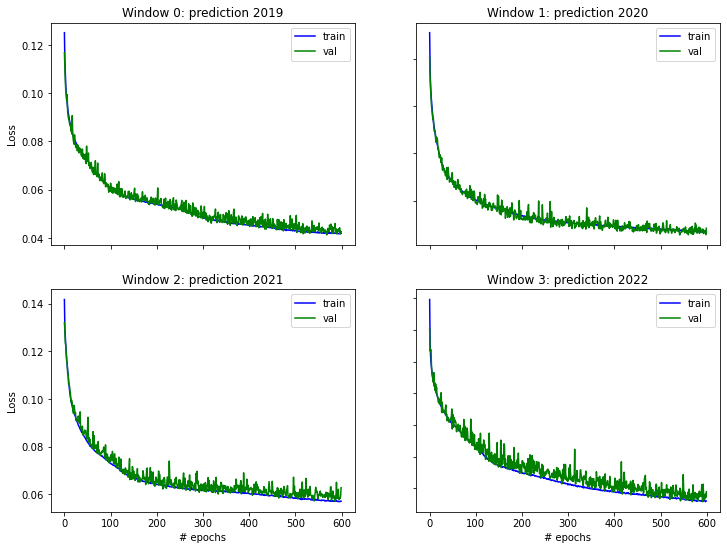

In [14]:
# plot loss curves

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

axs[0, 0].plot(dict_train_history[0][0], dict_train_history[0][1], 'b')
axs[0, 0].plot(dict_val_history[0][0], dict_val_history[0][1], 'g')
axs[0, 0].set_title('Window 0: prediction 2019')
axs[0, 0].legend(['train','val'], loc='upper right')

axs[0, 1].plot(dict_train_history[1][0], dict_train_history[1][1], 'b')
axs[0, 1].plot(dict_val_history[1][0], dict_val_history[1][1], 'g')
axs[0, 1].set_title('Window 1: prediction 2020')
axs[0, 1].legend(['train','val'], loc='upper right')

axs[1, 0].plot(dict_train_history[2][0], dict_train_history[2][1], 'b')
axs[1, 0].plot(dict_val_history[2][0], dict_val_history[2][1], 'g')
axs[1, 0].set_title('Window 2: prediction 2021')
axs[1, 0].legend(['train','val'], loc='upper right')

axs[1, 1].plot(dict_train_history[3][0], dict_train_history[3][1], 'b')
axs[1, 1].plot(dict_val_history[3][0], dict_val_history[3][1], 'g')
axs[1, 1].set_title('Window 3: prediction 2022')
axs[1, 1].legend(['train','val'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='# epochs', ylabel='Loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


## Build dataframe with predicted weights 

In [15]:
# monta o dataframe com as predições de pesos em cada janela
pred_list_df = []

for w in dic_pred_prep.keys():
    
    # build dataframe with weights
    predict_df = pd.DataFrame(dic_pred_prep[w][1], columns=['w_F1', 'w_F2', 'w_F3', 'w_F4'])
    
    # build dataframe with portfolios
    port_df = pd.DataFrame(pred_port_list, columns=['F1', 'F2', 'F3', 'F4'])
    
    # concatenate dataframes
    pred_port_df = pd.concat([port_df, predict_df], axis=1, ignore_index=False)
    
    # add window column
    pred_port_df['window'] = w
    
    pred_list_df.append(pred_port_df)

prediction_df = pd.concat(pred_list_df, ignore_index=True)


In [16]:
prediction_df

,F1,F2,F3,F4,w_F1,w_F2,w_F3,w_F4,window
0,Alaska Black FIC FIA BDR Nível I,Apex Ações 30 FIC FIA,ARX Income FIC FIA,Atlas One FIC FIA,0.027730,4.822990e-02,0.064055,0.859985,0
1,Alaska Black FIC FIA BDR Nível I,Apex Ações 30 FIC FIA,ARX Income FIC FIA,Atmos Ações FIC FIA,0.027482,1.204371e-01,0.062234,0.789846,0
2,Alaska Black FIC FIA BDR Nível I,Apex Ações 30 FIC FIA,ARX Income FIC FIA,AZ Quest Small Mid Caps FIC FIA,0.001296,2.119622e-03,0.003566,0.993019,0
3,Alaska Black FIC FIA BDR Nível I,Apex Ações 30 FIC FIA,ARX Income FIC FIA,Bahia AM Smid Caps Valor FIC FIA,0.128078,1.901236e-01,0.603148,0.078650,0
4,Alaska Black FIC FIA BDR Nível I,Apex Ações 30 FIC FIA,ARX Income FIC FIA,BNP Paribas Small Caps FIA,0.017588,8.136175e-02,0.059721,0.841330,0
...,...,...,...,...,...,...,...,...,...
143835,Squadra Long Only FIC FIA,Tempo Capital Manacá FIC FIA,Velt FIC FIA,VOKIN GBV,0.000940,1.735209e-04,0.033073,0.965813,3
143836,Squadra Long Only FIC FIA,Tempo Capital Manacá FIC FIA,Velt FIC FIA,XP Investor FIA,0.000003,1.086208e-05,0.000014,0.999971,3
143837,Squadra Long Only FIC FIA,Tempo Capital Manacá FIC FIA,VOKIN GBV,XP Investor FIA,0.000359,3.659589e-05,0.000655,0.998949,3
143838,Squadra Long Only FIC FIA,Velt FIC FIA,VOKIN GBV,XP Investor FIA,0.000028,7.535840e-08,0.000927,0.999045,3


## Download predicted weights

In [17]:
prediction_df.to_csv(r'./predicted_weights/FIA1_3x20layers_relu_20142022_pred_weights_output.csv',
                    encoding = 'utf-8-sig',
                    index = False)
